In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
df=pd.read_csv("/processed_Customer_dataset.csv")

#Define feature (X) and Target(y)
X = df.drop('Churn_Yes',axis=1)
y = df['Churn_Yes']

#Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Initialize and train a RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest.fit(X_train, y_train)

#Make predections in Test set
y_pred_rf = randomForest.predict(X_test)

#Evaluate the model
print('Classification Report',classification_report(y_test, y_pred_rf))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_rf))
print("Accuracy: ",accuracy_score(y_test, y_pred_rf))

Classification Report               precision    recall  f1-score   support

       False       0.82      0.93      0.87      1036
        True       0.69      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409

Confusion Matrix:  [[963  73]
 [208 165]]
Accuracy:  0.8005677785663591


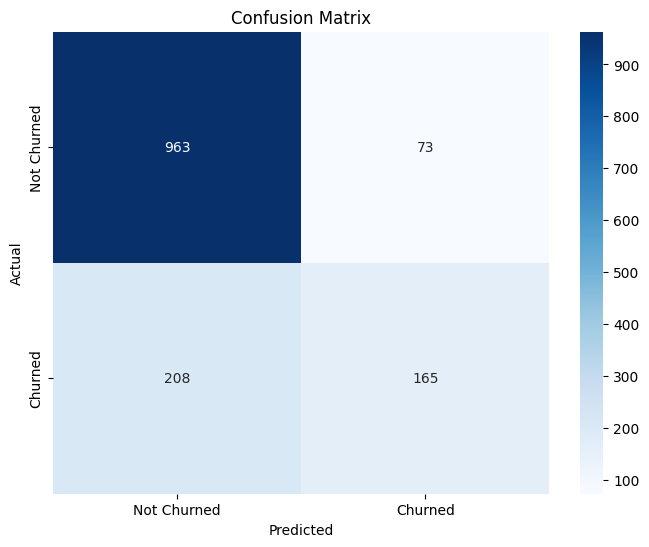


Feature Importance:


,0
TotalCharges,0.099911
tenure,0.096205
MonthlyCharges,0.087765
Contract_Two year,0.029007
InternetService_Fiber optic,0.028585
...,...
customerID_4628-WQCQQ,0.000000
customerID_8364-TRMMK,0.000000
customerID_4632-XJMEX,0.000000
customerID_4634-JLRJT,0.000000


In [ ]:
#Plot Confusion Matrix using Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize = (8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (for interpretability)
feature_importances = pd.Series(randomForest.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
feature_importances

In [ ]:
 #Plot Confusion Matrix using Logistic Regression model

# Initialize and train a Logistic Regression model
log_regress = LogisticRegression()
log_regress.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_regress = log_regress.predict(X_test)

# Evaluate the Logistic Regression model
print("\nLogistic Regression Model Evaluation:")
print('Classification Report',classification_report(y_test, y_pred_log_regress))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_log_regress))
print("Accuracy: ",accuracy_score(y_test, y_pred_log_regress))



Logistic Regression Model Evaluation:
Classification Report               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Confusion Matrix:  [[934 102]
 [149 224]]
Accuracy:  0.8218594748048261


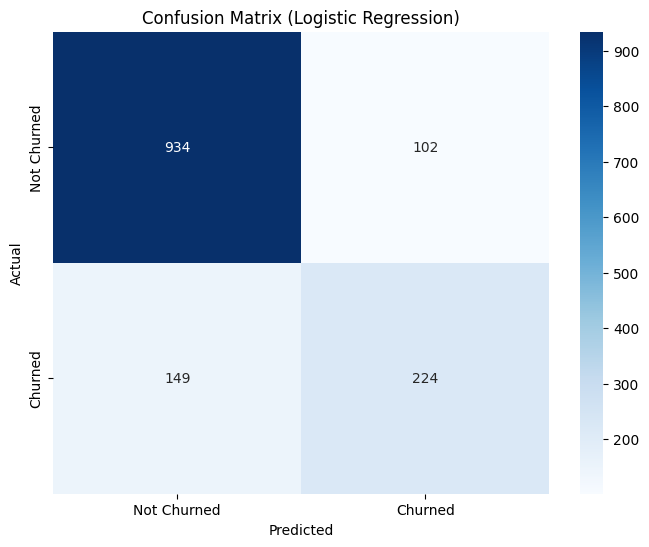

In [ ]:
# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_log_regress)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


In [ ]:
#Train dataset using Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the Logistic Regression model
print("\nSupport Vector Machine model Evaluation:")
print('Classification Report',classification_report(y_test, y_pred_svm))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_svm))
print("Accuracy: ",accuracy_score(y_test, y_pred_svm))





Support Vector Machine model Evaluation:
Classification Report               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:  [[934 102]
 [157 216]]
Accuracy:  0.8161816891412349


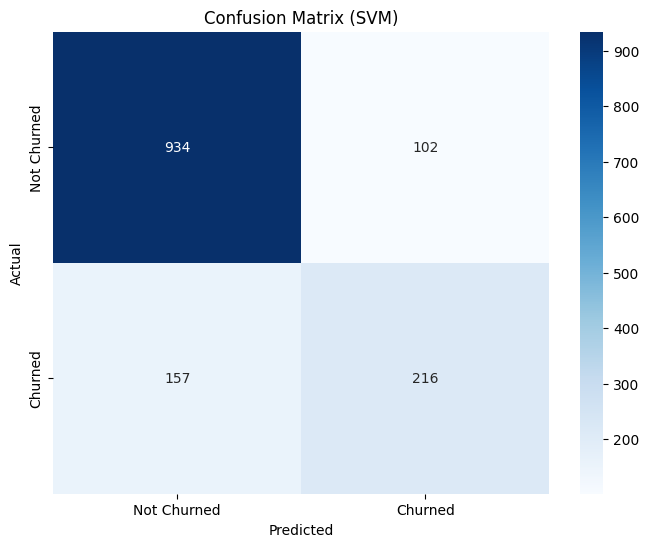

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [ ]:
# prompt: Tune the Hyperparameters of Random Forest, Logisitic Regression and SVM to improve performance


# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
print("\nTuned Random Forest:")
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))


# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 3],
    'penalty': ['l2'],
    'solver': ['liblinear'] # Solvers that support l1 penalty
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test)
print("\nTuned Logistic Regression:")
print("Best Hyperparameters:", grid_search_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))


# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)
print("\nTuned SVM:")
print("Best Hyperparameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))


Tuned Random Forest:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8062455642299503

Tuned Logistic Regression:
Best Hyperparameters: {'C': 3, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8204400283889283

Tuned SVM:
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8161816891412349


In [ ]:
#